In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Storminalis/vcf_filtering/Storminalis_SNP_sampleFilt.vcf.gz', '/users/mcevoysu/scratch/output/Storminalis/scikit-allel/Storminalis_SNP_sampleFilt.h5', fields='*')

## Get data

In [3]:
callset_var_fn = '/users/mcevoysu/scratch/output/Storminalis/scikit-allel/Storminalis_SNP_sampleFilt.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [4]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [5]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_FILT',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [6]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(51350,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_FILT', '?'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=8.8M cbytes=2.2M cratio=4.0
   values=h5py._hl.group.Group>

In [7]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(51348,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_FILT', '?'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  6,  -1,  -1], [0.032,   nan,   nan], [b'T', b'', b''], 212, 0.   , b'Chr01',  2059, -1, 0.0971, False, False,  True, 0.   , b'.', 0.05  , [ 18,  -1,  -1], [0.036,   nan,   nan], 50.88, 0.431,    17189, 19.07,   3280.01, [-1, -1], b'C',  0.032, 0.74 , [0, 0, 0],  True, 1)
 ([  6,  -1,  -1], [0.032,   nan,   nan], [b'T', b'', b''], 212, 0.   , b'Chr01',  2065, -1, 0.0963, False, False,  True, 0.   , b'.', 0.0577, [ 17,  -1,  -1], [0.034,   nan,   nan], 50.94, 0.431,    17190, 19.06,   3278.26, [-1, -1], b'G',  0.   , 0.74 , [0, 0, 0],  True, 1)
 ([312,  -1,  -1], [0.788,   nan,   nan], [b'G', b'', b''], 378, 0.   , b'Chr01',  3473, -1, 0.    , False, False,  True, 0.   , b'.', 0.3117, [402,  -1,  -1], [0.81 ,   nan,   nan], 57.07, 0.187,    17237, 27.24, 123765.  , [-1, -1], b'C',  0.257, 2.966, [0, 0, 0],  True, 1)
 ...
 ([  6,  -1,  -1], [0.012,   nan,   nan], [b'C', b'', b''], 490, 0.434, b'Chr17', 24021, -1, 0.0008, False, False,  True, 0.458, b'.', 0.3718, [  6,  -1,  -1], [0.012,   nan,   nan], 60.  , 0.   , 34338033, 23.25,   7719.05, [-1, -1], b'G',  0.113, 0.649, [0, 0, 0],  True, 1)
 ([261,  -1,  -1], [0.542,   nan,   nan], [b'C', b'', b''], 462, 0.   , b'Chr17',  6762, -1, 0.7781, False, False,  True, 0.   , b'.', 0.0424, [274,  -1,  -1], [0.552,   nan,   nan], 60.  , 0.   , 34338146, 29.39, 155266.  , [-1, -1], b'A', -0.18 , 3.133, [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.01 ,   nan,   nan], [b'T', b'', b''], 442, 0.   , b'Chr17',  4997, -1, 0.0891, False, False,  True, 0.   , b'.', 0.098 , [  5,  -1,  -1], [0.01 ,   nan,   nan], 60.  , 0.   , 34338167, 15.02,   1381.73, [-1, -1], b'C', -0.464, 0.437, [0, 0, 0],  True, 1)]

In [8]:
notsnp = variants_np.query('(is_snp != True)')
notsnp

,AC,AF,ALT,AN,BaseQRankSum,CHROM,DP,END,ExcessHet,FILTER_FILT,FILTER_LowQual,FILTER_PASS,FS,ID,InbreedingCoeff,MLEAC,MLEAF,MQ,MQRankSum,POS,QD,QUAL,RAW_MQandDP,REF,ReadPosRankSum,SOR,altlen,is_snp,numalt
0,[ 2 -1 -1],[0.006048 nan nan],[b'*' b'' b''],338,-2.846,b'Chr07',4412,-1,0.0272,False,False,True,0.0,b'.',0.1006,[ 3 -1 -1],[0.006048 nan nan],53.35,1.22,690790,4.96,94.32,[-1 -1],b'C',1.43,0.081,[-1 0 0],False,1
1,[ 2 -1 -1],[0.008065 nan nan],[b'*' b'' b''],356,nan,b'Chr07',4626,-1,0.054,False,False,True,0.0,b'.',0.0926,[ 4 -1 -1],[0.008065 nan nan],56.57,nan,690793,2.69,94.07,[-1 -1],b'T',nan,0.077,[-1 0 0],False,1


## Plot function

In [9]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [10]:
numalt = rawsnps['numalt']
np.max(numalt)

1

In [11]:
count_numalt = np.bincount(numalt)
count_numalt

array([    0, 51348])

In [12]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

0

In [13]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(51348,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_FILT', '?'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  6,  -1,  -1], [0.032,   nan,   nan], [b'T', b'', b''], 212, 0.   , b'Chr01',  2059, -1, 0.0971, False, False,  True, 0.   , b'.', 0.05  , [ 18,  -1,  -1], [0.036,   nan,   nan], 50.88, 0.431,    17189, 19.07,   3280.01, [-1, -1], b'C',  0.032, 0.74 , [0, 0, 0],  True, 1)
 ([  6,  -1,  -1], [0.032,   nan,   nan], [b'T', b'', b''], 212, 0.   , b'Chr01',  2065, -1, 0.0963, False, False,  True, 0.   , b'.', 0.0577, [ 17,  -1,  -1], [0.034,   nan,   nan], 50.94, 0.431,    17190, 19.06,   3278.26, [-1, -1], b'G',  0.   , 0.74 , [0, 0, 0],  True, 1)
 ([312,  -1,  -1], [0.788,   nan,   nan], [b'G', b'', b''], 378, 0.   , b'Chr01',  3473, -1, 0.    , False, False,  True, 0.   , b'.', 0.3117, [402,  -1,  -1], [0.81 ,   nan,   nan], 57.07, 0.187,    17237, 27.24, 123765.  , [-1, -1], b'C',  0.257, 2.966, [0, 0, 0],  True, 1)
 ...
 ([  6,  -1,  -1], [0.012,   nan,   nan], [b'C', b'', b''], 490, 0.434, b'Chr17', 24021, -1, 0.0008, False, False,  True, 0.458, b'.', 0.3718, [  6,  -1,  -1], [0.012,   nan,   nan], 60.  , 0.   , 34338033, 23.25,   7719.05, [-1, -1], b'G',  0.113, 0.649, [0, 0, 0],  True, 1)
 ([261,  -1,  -1], [0.542,   nan,   nan], [b'C', b'', b''], 462, 0.   , b'Chr17',  6762, -1, 0.7781, False, False,  True, 0.   , b'.', 0.0424, [274,  -1,  -1], [0.552,   nan,   nan], 60.  , 0.   , 34338146, 29.39, 155266.  , [-1, -1], b'A', -0.18 , 3.133, [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.01 ,   nan,   nan], [b'T', b'', b''], 442, 0.   , b'Chr17',  4997, -1, 0.0891, False, False,  True, 0.   , b'.', 0.098 , [  5,  -1,  -1], [0.01 ,   nan,   nan], 60.  , 0.   , 34338167, 15.02,   1381.73, [-1, -1], b'C', -0.464, 0.437, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

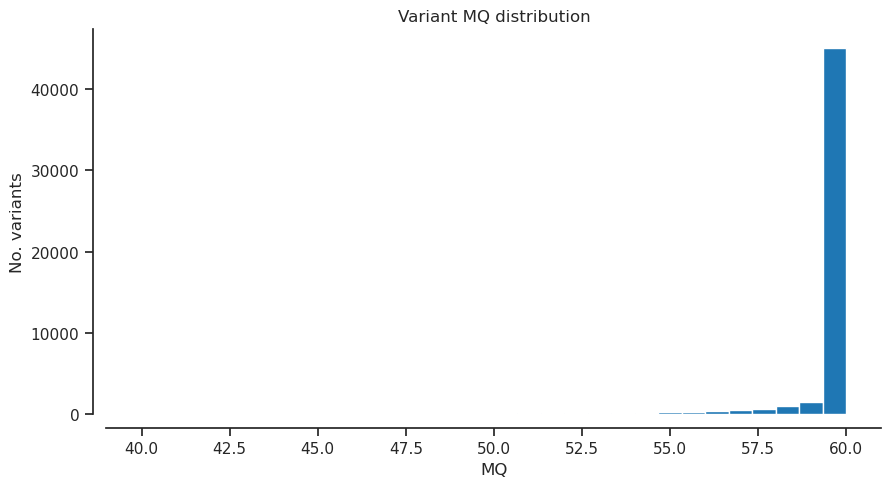

In [14]:
plot_hist('MQ','var') # RMS mapping quality

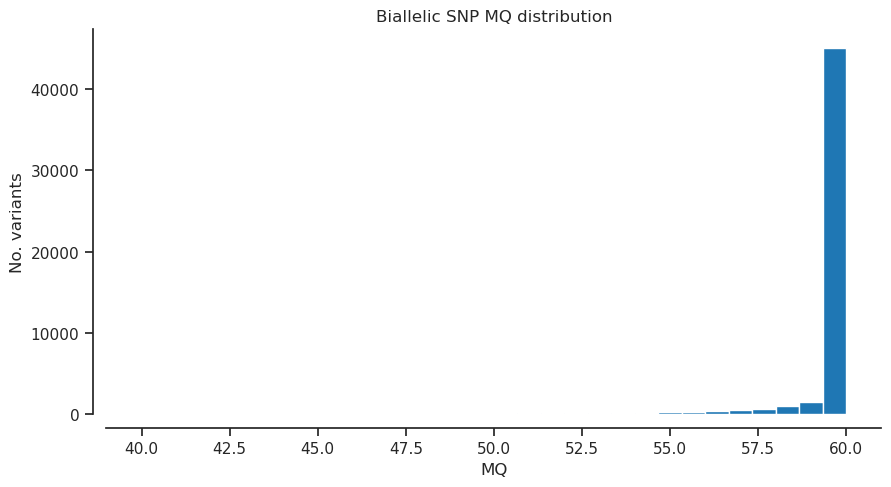

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

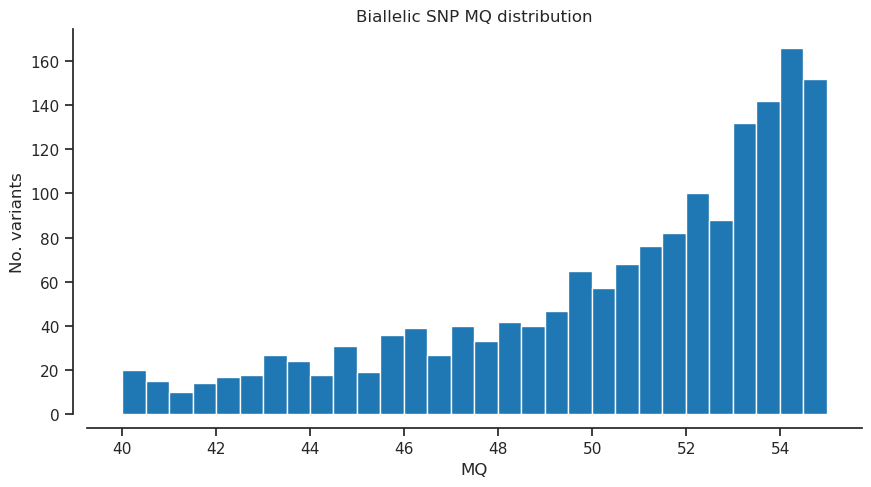

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

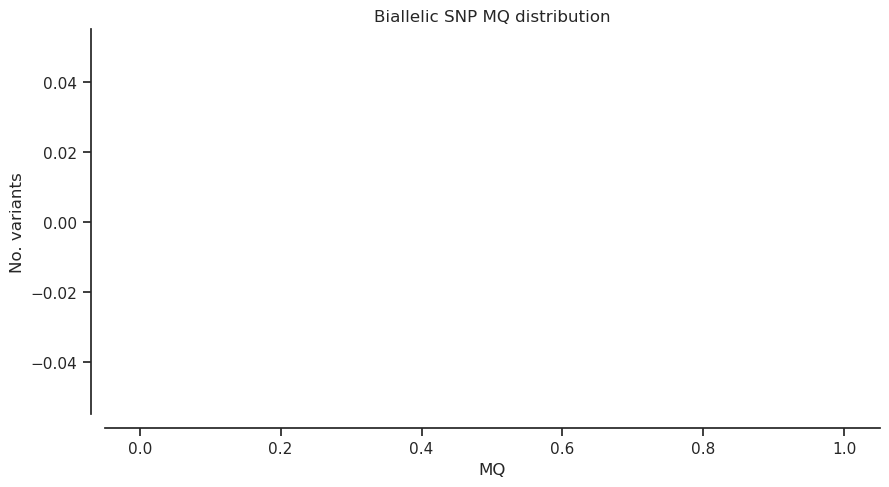

In [19]:
plot_hist('MQ')

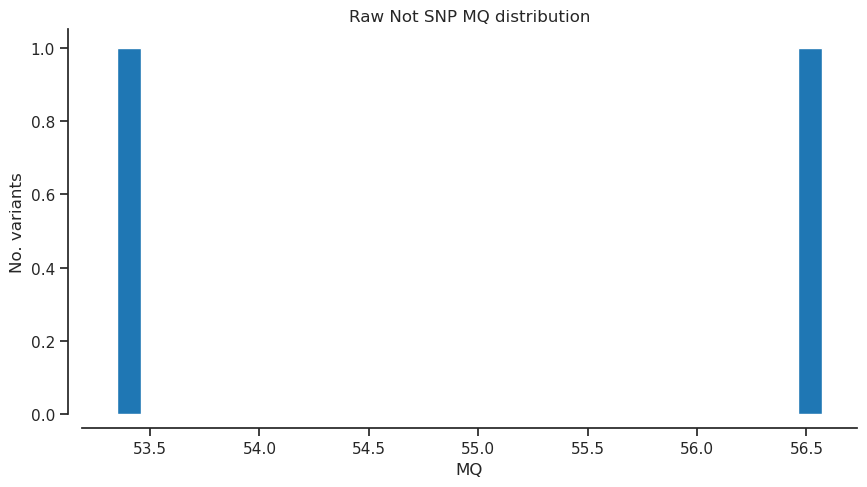

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

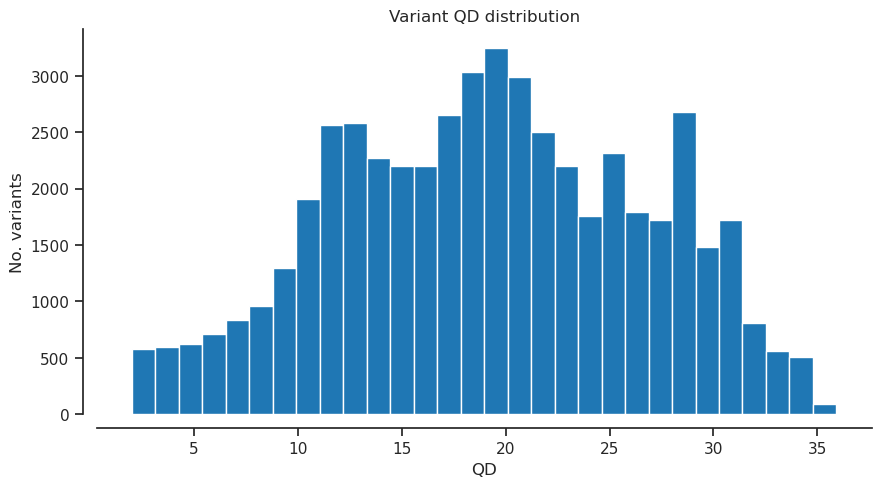

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

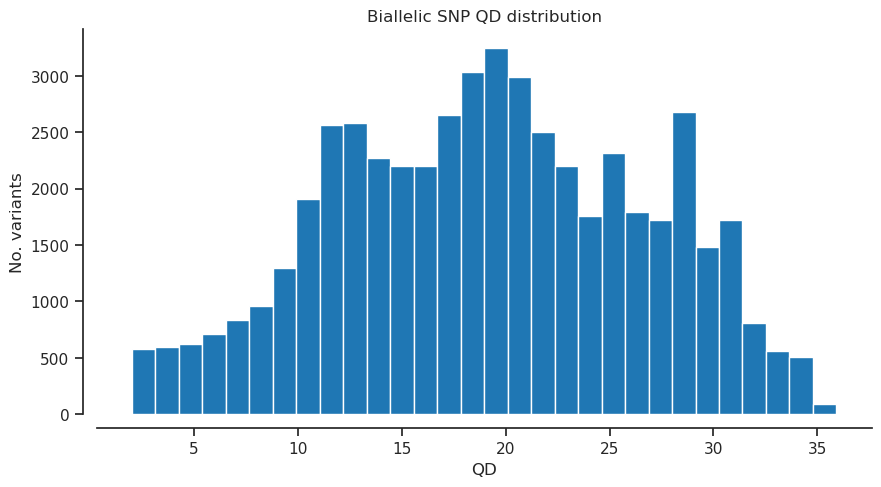

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

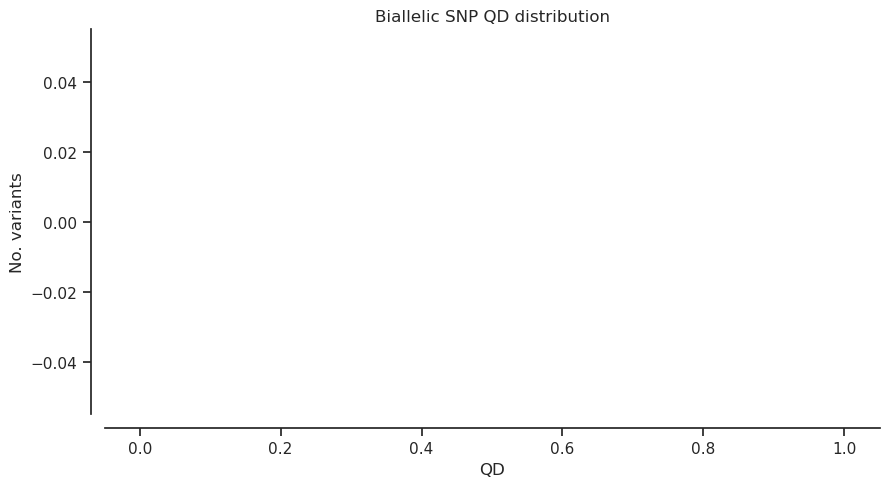

In [24]:
plot_hist('QD')

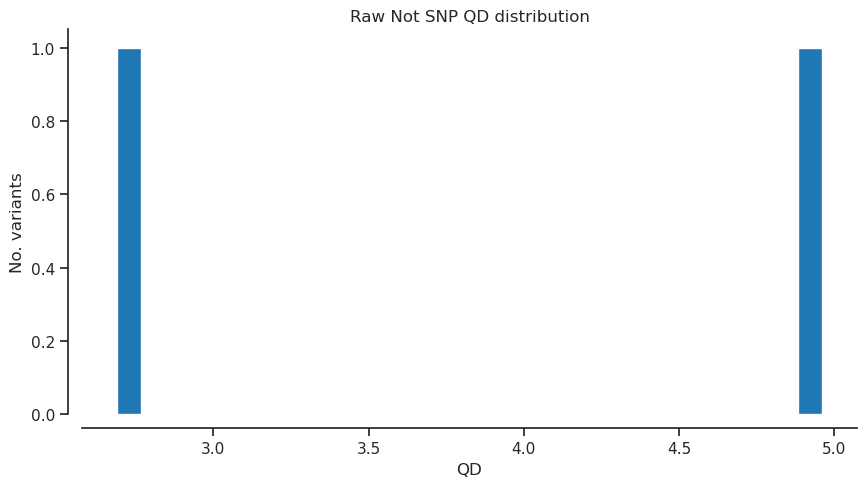

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

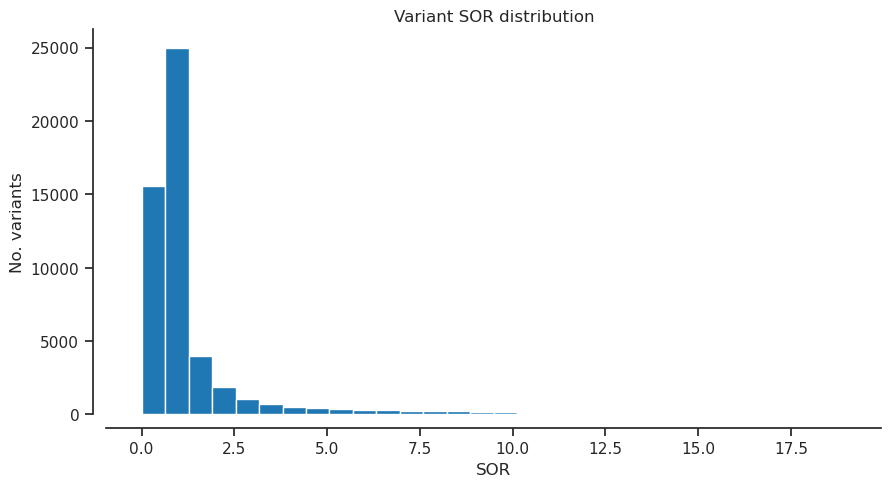

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

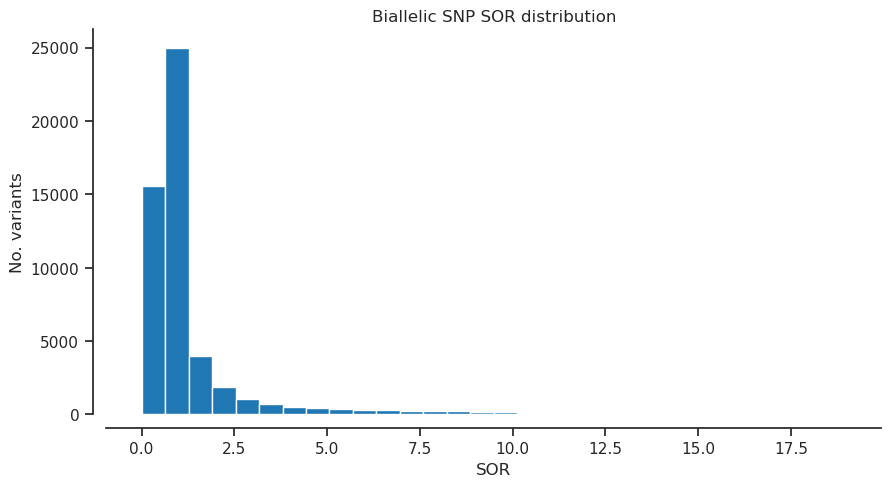

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

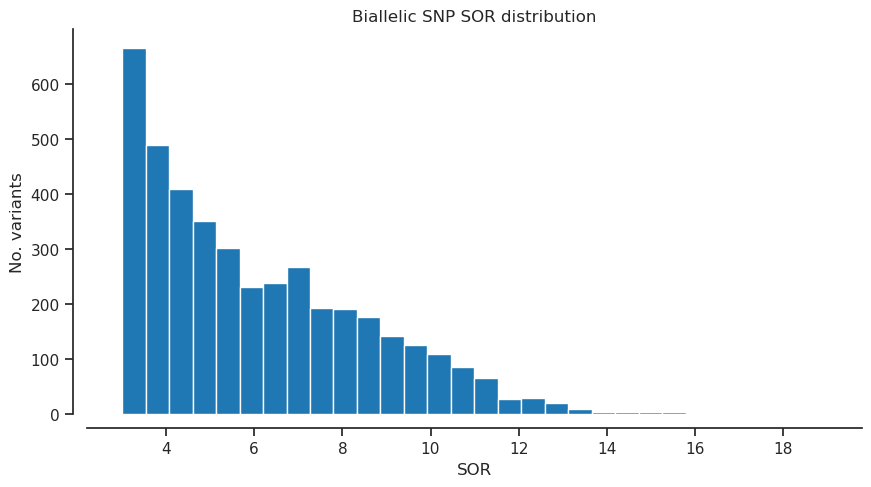

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

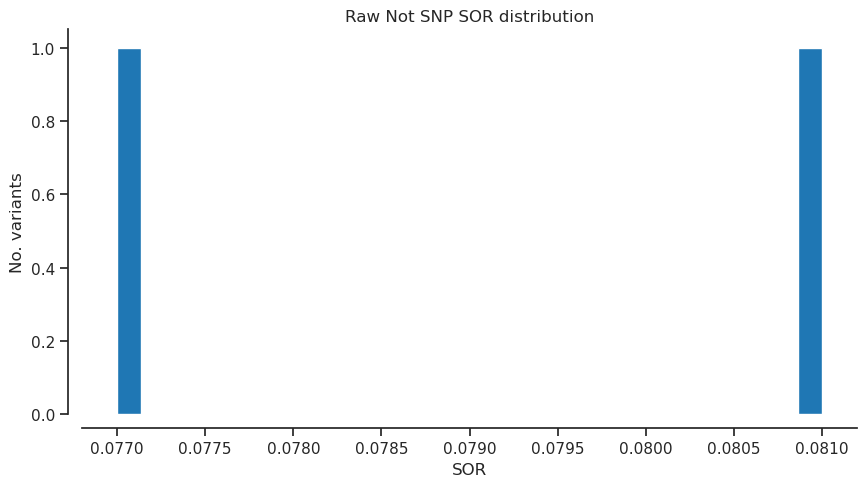

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

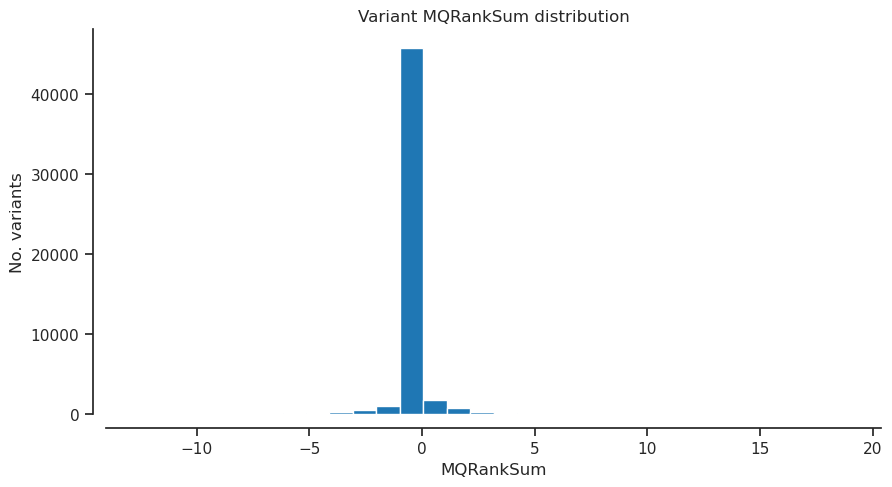

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

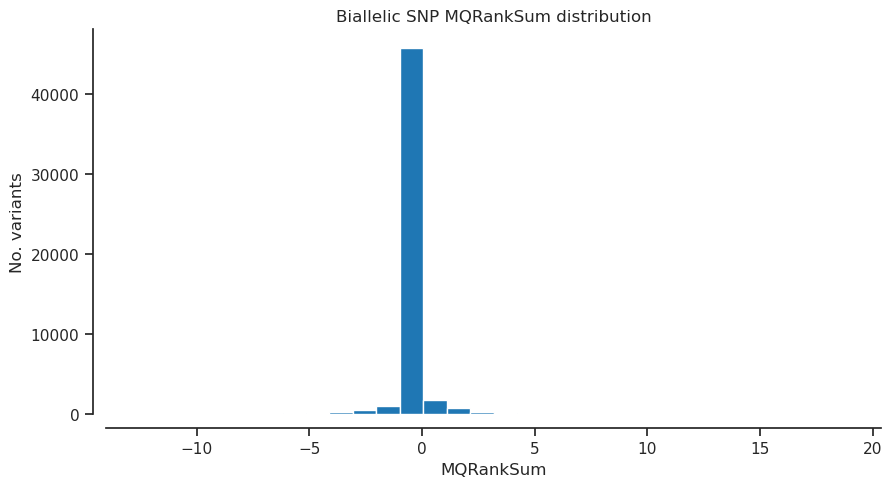

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

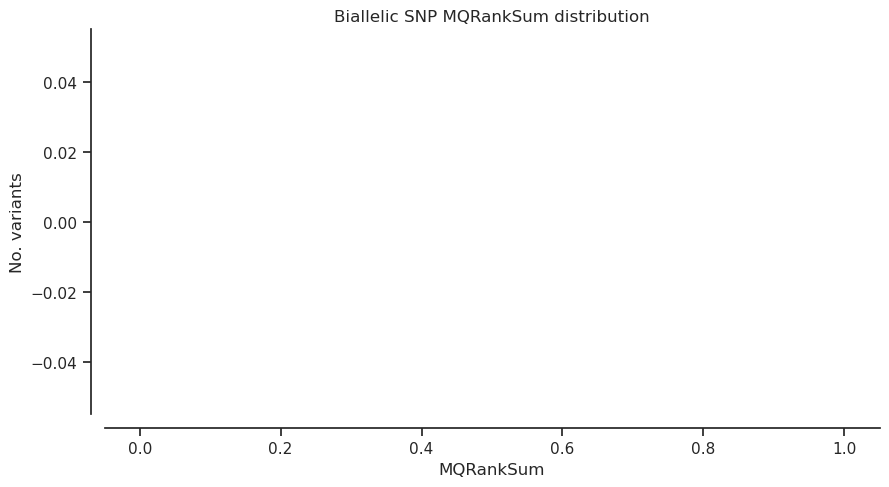

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

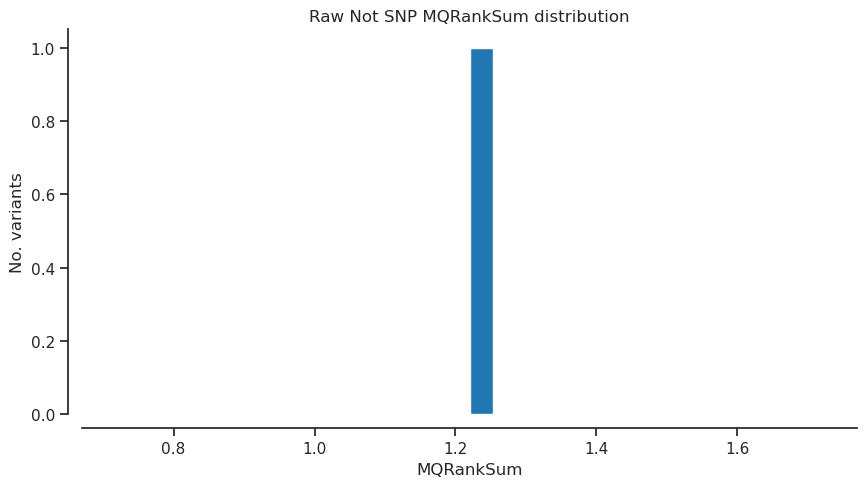

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

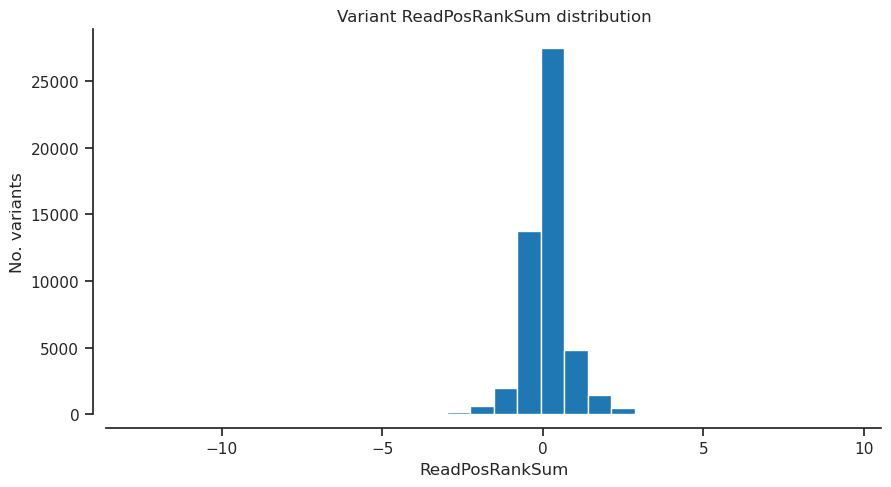

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

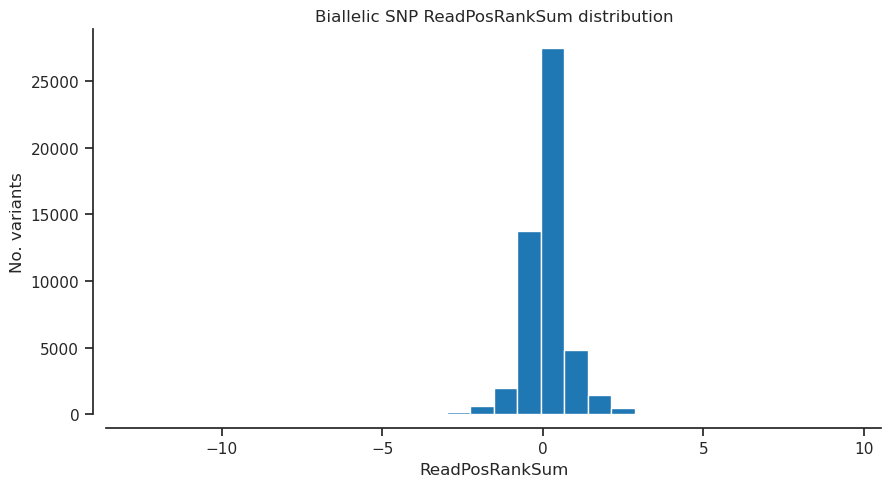

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

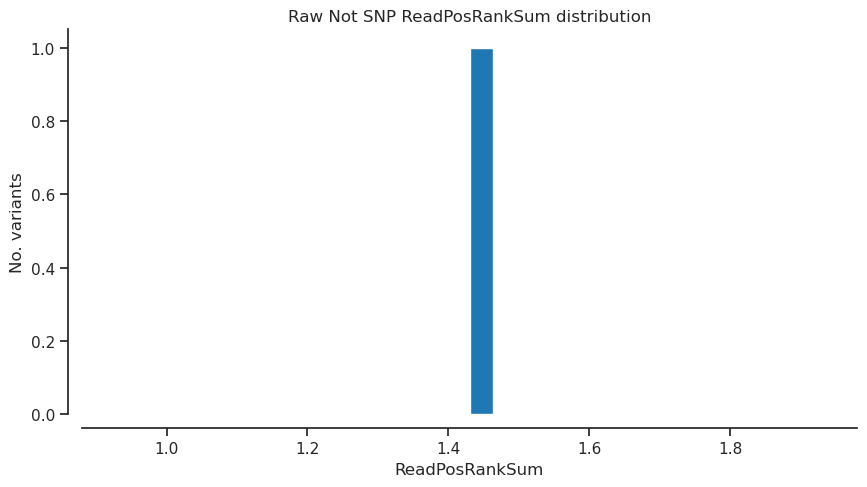

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

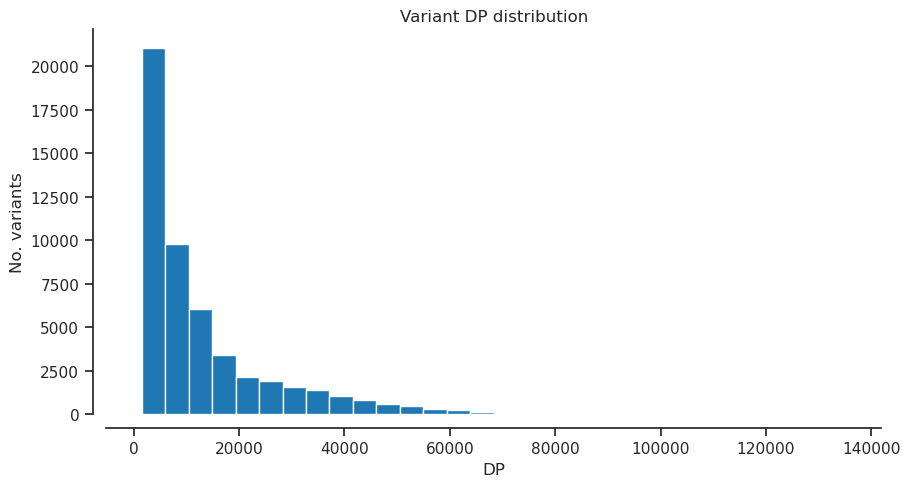

In [39]:
plot_hist('DP','var')

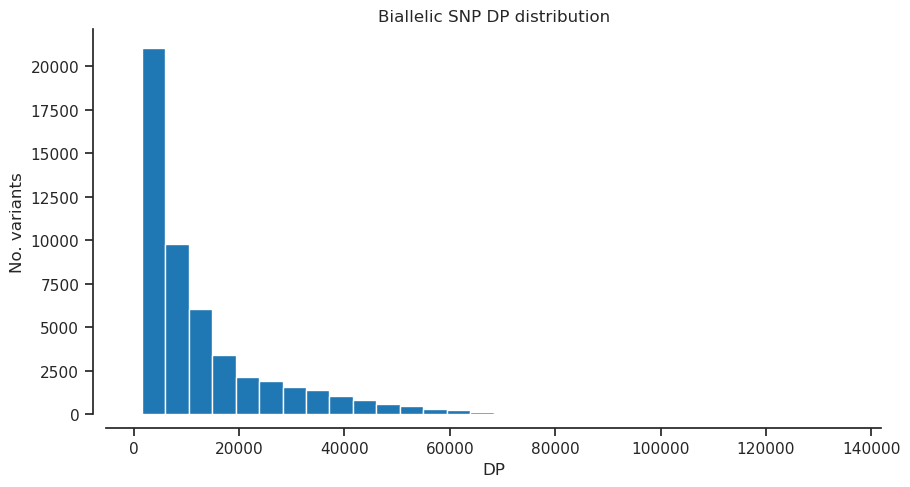

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

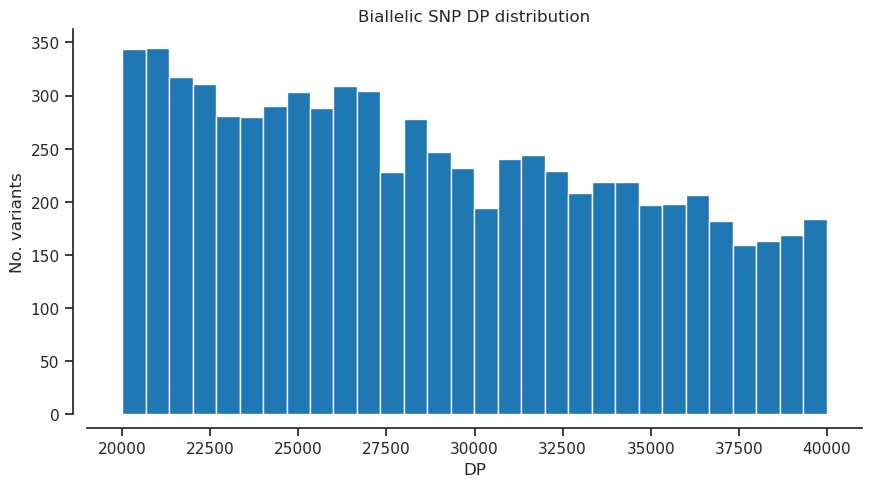

In [42]:
plot_hist('DP')

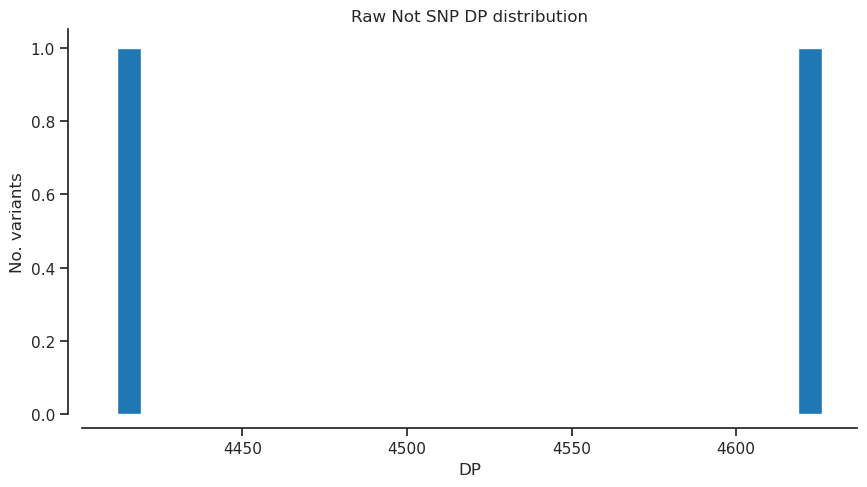

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

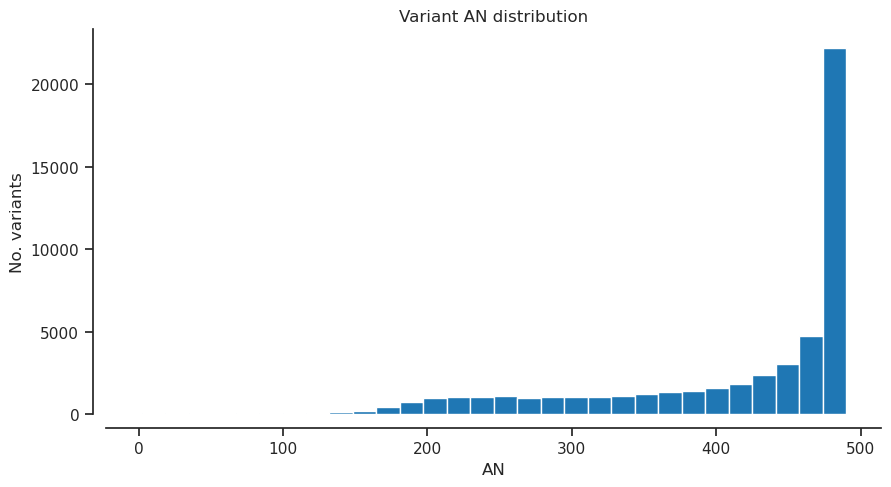

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

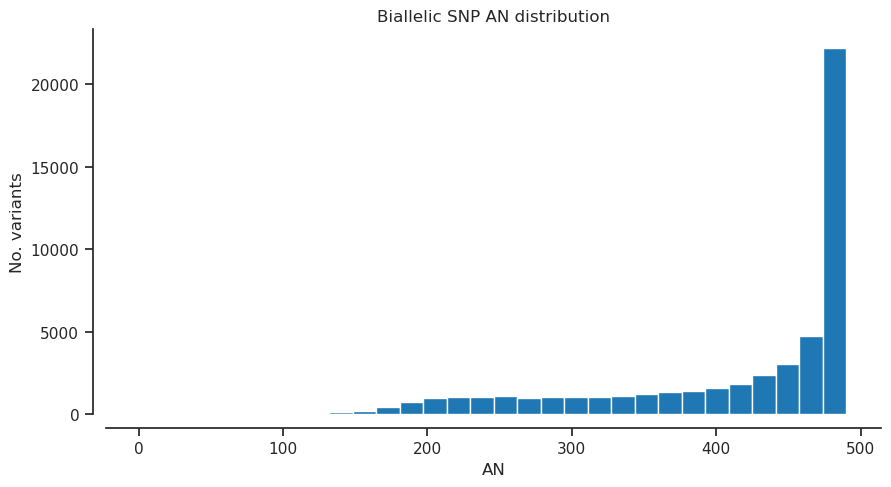

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

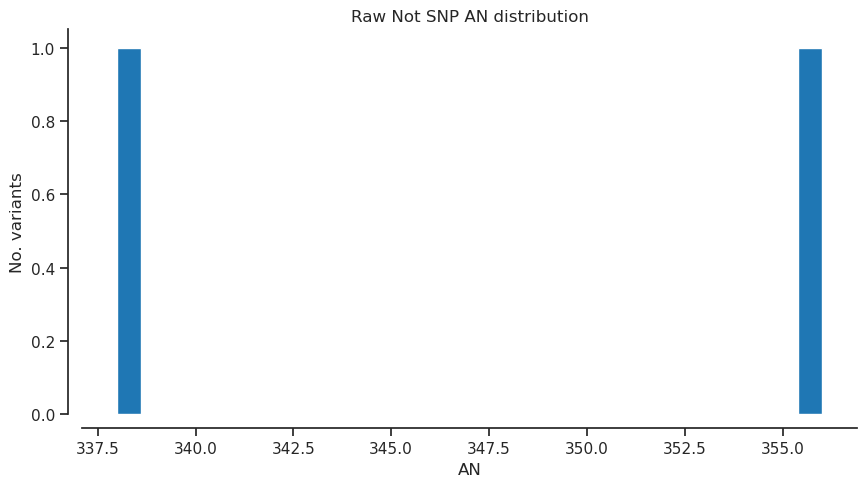

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [47]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

51180

## Genotype

In [48]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [49]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(51350, 245, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=24.0M cbytes=3.5M cratio=6.9
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [50]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(51180, 245, 2) dtype=int8 chunks=(1600, 245, 2)
   nbytes=23.9M cbytes=6.0M cratio=4.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [51]:
# grab the allele counts for the populations
ac = gt_filtered_snps.count_alleles()
ac

<AlleleCountsChunkedArray shape=(51180, 2) dtype=int32 chunks=(25590, 2)
   nbytes=399.8K cbytes=145.5K cratio=2.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [52]:
ac[:]

<AlleleCountsArray shape=(51180, 2) dtype=int32>
206   6
206   6
 66 312
...
484   6
201 261
438   4

In [53]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

<AlleleCountsArray shape=(51180, 2) dtype=int32>
206   6
206   6
 66 312
...
484   6
201 261
438   4

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

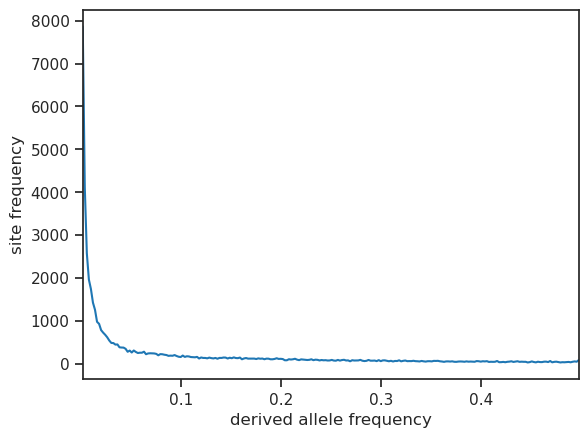

In [54]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [55]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(51180,) dtype=bool chunks=(51180,)
   nbytes=50.0K cbytes=556 cratio=92.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [56]:
# select only the biallelic variants
gt_biallelic = gt_filtered_snps.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(51180, 245, 2) dtype=int8 chunks=(1600, 245, 2)
   nbytes=23.9M cbytes=6.0M cratio=4.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [57]:
n_variants = len(gt_biallelic)
n_variants

51180

In [58]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [59]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'AUT00154-001',
 b'AUT00154-002',
 b'AUT00154-003',
 b'AUT00154-004',
 b'AUT00154-005',
 b'AUT00154-006',
 b'AUT00154-007',
 b'AUT00154-008',
 b'AUT00154-009',
 b'AUT00154-010',
 b'AUT00154-011',
 b'AUT00154-012',
 b'AUT00154-013',
 b'AUT00154-014',
 b'AUT00154-015',
 b'AUT00154-016',
 b'AUT00154-017',
 b'AUT00154-018',
 b'AUT00154-019',
 b'AUT00154-020',
 b'AUT00154-021',
 b'AUT00154-022',
 b'AUT00154-023',
 b'AUT00154-024',
 b'AUT00154-025',
 b'BGR00003-002',
 b'BGR00003-003',
 b'BGR00003-004',
 b'BGR00003-005',
 b'BGR00003-006',
 b'BGR00003-007',
 b'BGR00003-008',
 b'BGR00003-009',
 b'BGR00003-010',
 b'BGR00003-011',
 b'BGR00003-012',
 b'BGR00003-013',
 b'BGR00003-014',
 b'BGR00003-015',
 b'BGR00003-016',
 b'BGR00003-017',
 b'BGR00003-018',
 b'BGR00003-019',
 b'BGR00003-020',
 b'BGR00003-021',
 b'BGR00003-022',
 b'BGR00003-023',
 b'BGR00003-024',
 b'BGR00003-025',
 b'BIH00043-001',
 b'BIH00043-002',
 b'BIH00043-003',
 b'BIH00043-004',
 b'BIH00043-005',
 b'BIH00043-006',
 b'BIH0004

In [72]:
samples_fn = '~/scratch/data/Storminalis/Storminalis_sample_list_filtered.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,AUT00154-001,AUT00154
1,AUT00154-002,AUT00154
2,AUT00154-003,AUT00154
3,AUT00154-004,AUT00154
4,AUT00154-005,AUT00154
...,...,...
240,SVN00039-017,SVN00039
241,SVN00039-018,SVN00039
242,SVN00039-019,SVN00039
243,SVN00039-020,SVN00039


In [73]:
samples.Population.value_counts()

Population
AUT00154    25
BIH00043    25
DEU00097    25
CZE00004    25
DEU00012    25
DEU00024    25
SVN00017    25
DNK00059    25
BGR00003    24
SVN00039    21
Name: count, dtype: int64

In [74]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['AUT00154', 'BGR00003', 'BIH00043', 'CZE00004', 'DEU00012',
       'DEU00024', 'DEU00097', 'DNK00059', 'SVN00017', 'SVN00039'],
      dtype=object)

## Gt frequency function

In [75]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 10)
    pop2color = {'AUT00154': palette[0],
                 'BGR00003': palette[5],
                 'BIH00043': palette[1],
                 'CZE00004': palette[6],
                 'DEU00012': palette[2],
                 'DEU00024': palette[7],
                 'DEU00097': palette[3],
                 'DNK00059': palette[8],
                 'SVN00017': palette[4],
                 'SVN00039': palette[9]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[7]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[9])]
    ax.legend(handles=handles, labels=['AUT00154', 'BGR00003', 'BIH00043', 'CZE00004', 'DEU00012',
       'DEU00024', 'DEU00097', 'DNK00059', 'SVN00017', 'SVN00039'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

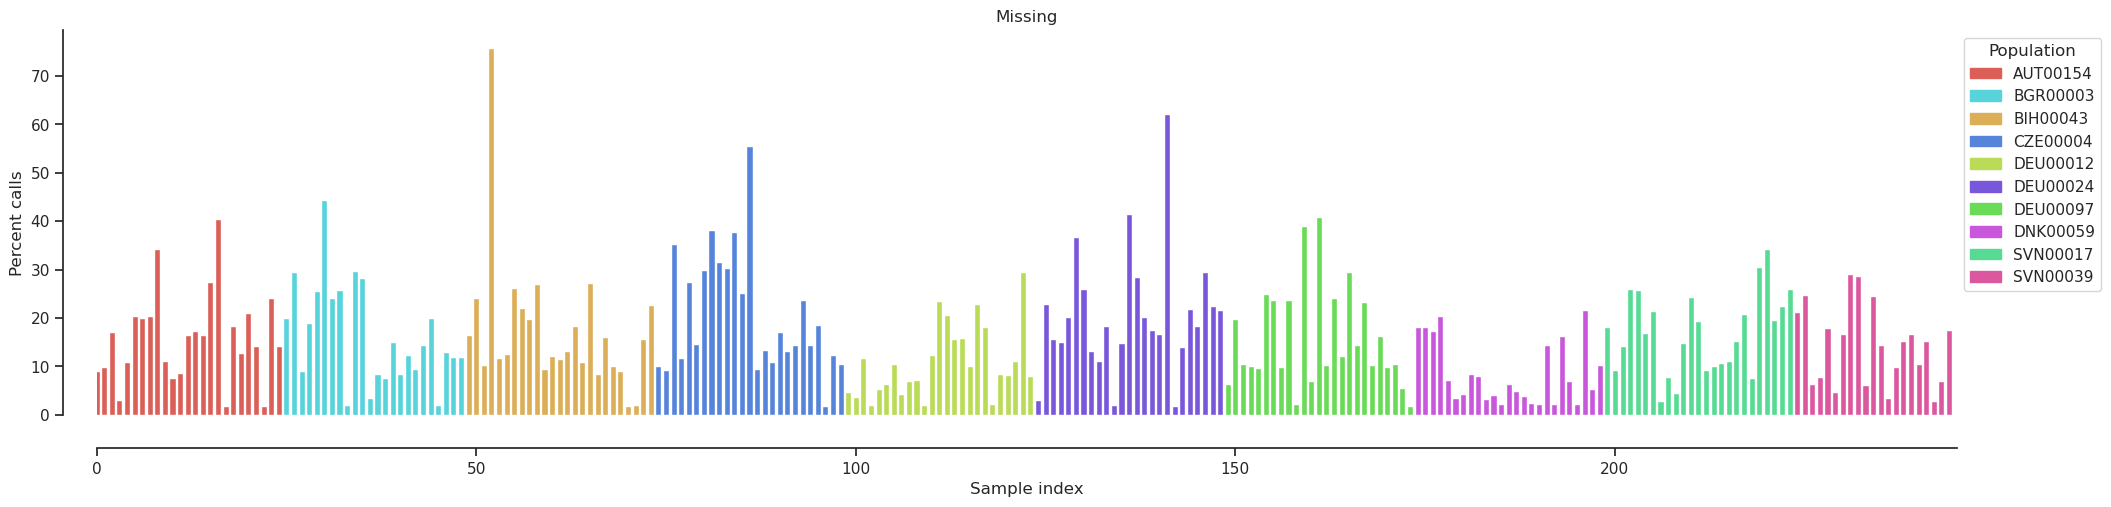

In [76]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

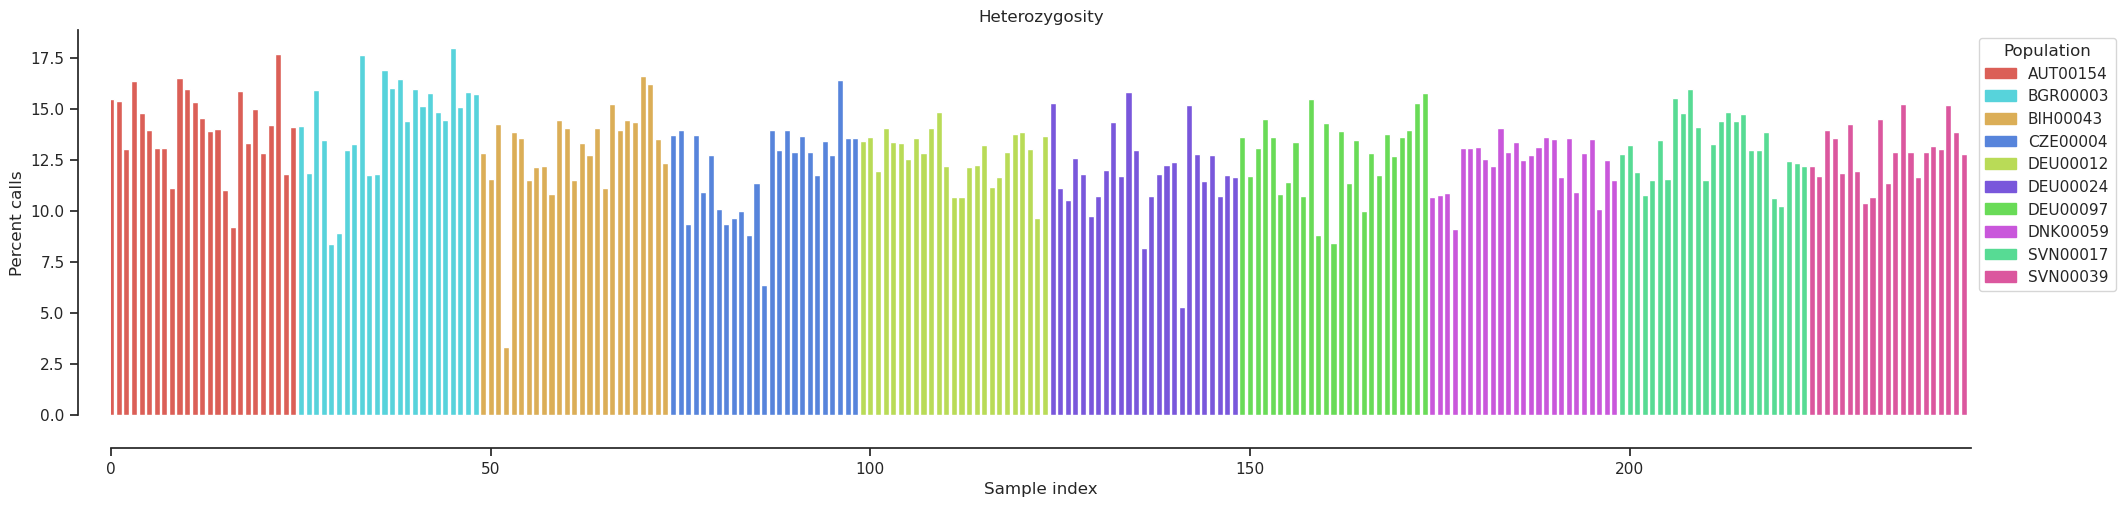

In [77]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [78]:
palette = sns.color_palette("hls",10)
pop_colours = {    
                'AUT00154': palette[0],
                 'BGR00003': palette[5],
                 'BIH00043': palette[1],
                 'CZE00004': palette[6],
                 'DEU00012': palette[2],
                 'DEU00024': palette[7],
                 'DEU00097': palette[3],
                 'DNK00059': palette[8],
                 'SVN00017': palette[4],
                 'SVN00039': palette[9]
}

In [79]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [80]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(51180, 2) dtype=int32 chunks=(25590, 2)
   nbytes=399.8K cbytes=145.5K cratio=2.7
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [81]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(43316, 245) dtype=int8 chunks=(2708, 245)
   nbytes=10.1M cbytes=2.5M cratio=4.0
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [82]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

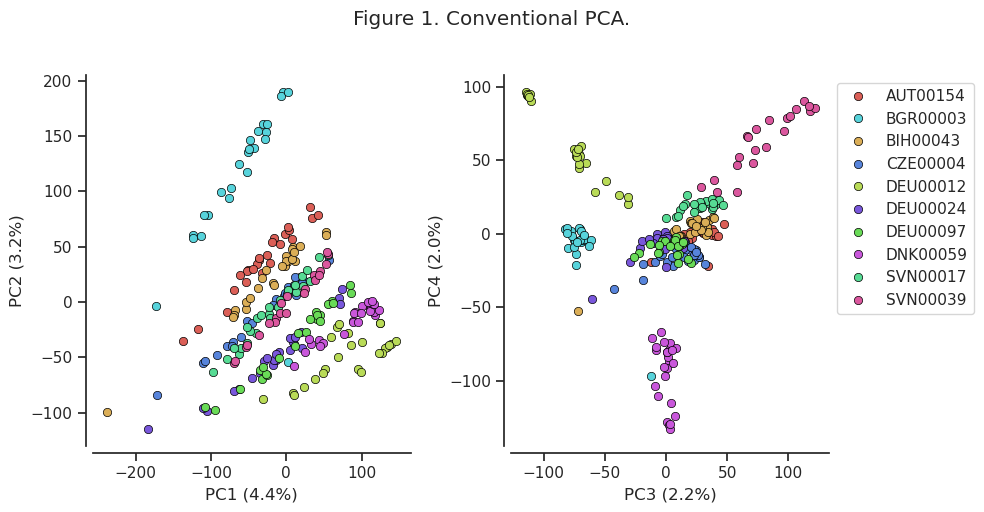

In [83]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')